# Problem statement
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.

# Hypothesis generation
Below are some of the factors which I think can affect the BigMart Sales:
+ Visibility: Higher the visibility of a product in store, higher is the sales of that item
+ Type: Daily need type of items have higher sales in general
+ MRP: Lower the MRP, Higher the sales of a product
+ Location: If outlet is in good location (easy reach, center of city, large population of city etc.), higher is the sales

# Data

| Variable | Description |
| :---: | :---: |
| Item_Identifier | Unique product ID |
| Item_Weight | Weight of product |
| Item_Fat_Content | Whether the product is low fat or not |
| Item_Visibility | The % of total display area of all products in a store allocated to the particular product |
| Item_Type | The category to which the product belongs |
| Item_MRP | Maximum Retail Price (list price) of the product |
| Outlet_Identifier | Unique store ID |
| Outlet_Establishment_Year | The year in which store was established |
| Outlet_Size | The size of the store in terms of ground area covered |
| Outlet_Location_Type | The type of city in which the store is located |
| Outlet_Type | Whether the outlet is just a grocery store or some sort of supermarket |
| Item_Outlet_Sales | Sales of the product in the particulat store. This is the outcome variable to be predicted. |

Explore the dataset and draw insights from it.

# Solution

## Load libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Load Train and test datasets

In [2]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

In [3]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


## Check features present in dataset

In [5]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [6]:
test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

### Print data types for each variable

In [7]:
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

We can see there are three format of data types:
+ object: Object format means variables are Categorical, which are - Item_Identifier, Item_Fat_Content, Item_Type, Outlet_Identifier, Outlet_Size, Outlet_Location_Type, Outlet_Type
+ int64: It represents the integer variables. Outlet_Establishment_Year is of this format.
+ float64: It represents the variable which have some decimal values involved. Item_Weight, Item_Visibility, Item_MRP, Item_Outlet_Sales

### Shape of dataset

In [8]:
train.shape

(8523, 12)

In [9]:
test.shape

(5681, 11)

We have 8523 rows and 12 columns in train dataset and 5681 rows and 11 columns in test dataset.

## Exploratory Data Analysis

### 1. Variable identification

| Variable | Type | Data Type | Category |
| :---: | :---: | :---: | :---: |
| Item_Identifier | Predictor | Character | Categorical |
| Item_Weight | Predictor | Numeric | Continuous |
| Item_Fat_Content | Predictor | Character | Categorical |
| Item_Visibility | Predictor | Numeric | Continuous |
| Item_Type | Predictor | Character | Categorical |
| Item_MRP | Predictor | Numeric | Continuous |
| Outlet_Identifier | Predictor | Character | Categorical |
| Outlet_Establishment_Year | Predictor | Numeric | Categorical |
| Outlet_Size | Predictor | Character | Categorical |
| Outlet_Location_Type | Predictor | Character | Categorical |
| Outlet_Type | Predictor | Character | Categorical |
| Item_Outlet_Sales | Target | Numeric | Continuous |

### 2. Univariate analysis
It is the simplest form of analyzing data where we examine each variable individually
+ For categorical variables: we can use frequency table or bar plots which will calculate the number of each category in a particular variable. 
+ For continuous variables: probability density plots can be used to look at the distribution of the variable.

#### Target variable
**Item_Outlet_Sales** is a continuous variable. Let's plot distribution plot to understand the distribution in dataset. 

C:\Users\Peeush Agarwal\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


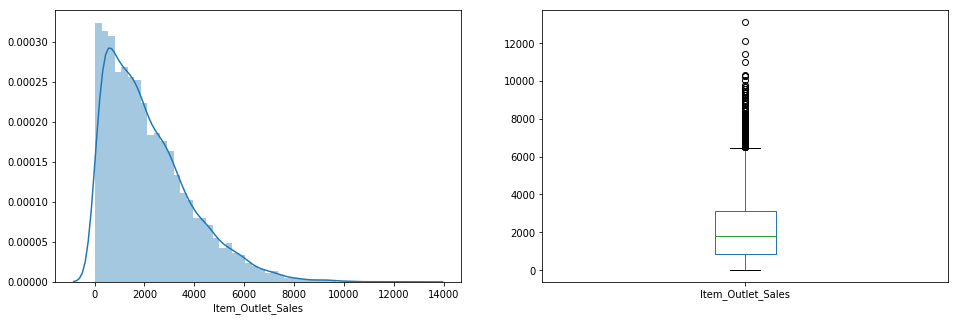

In [10]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['Item_Outlet_Sales'])
plt.subplot(122)
train['Item_Outlet_Sales'].plot.box(figsize=(16,5))
plt.show()

Looking at the distribution, it is left skewed and there are outliers present in values. It means that some outlets are showing good sales compared to other outlets. Average sales is approximate 2000 units. 

#### Independent variables (Categorical)

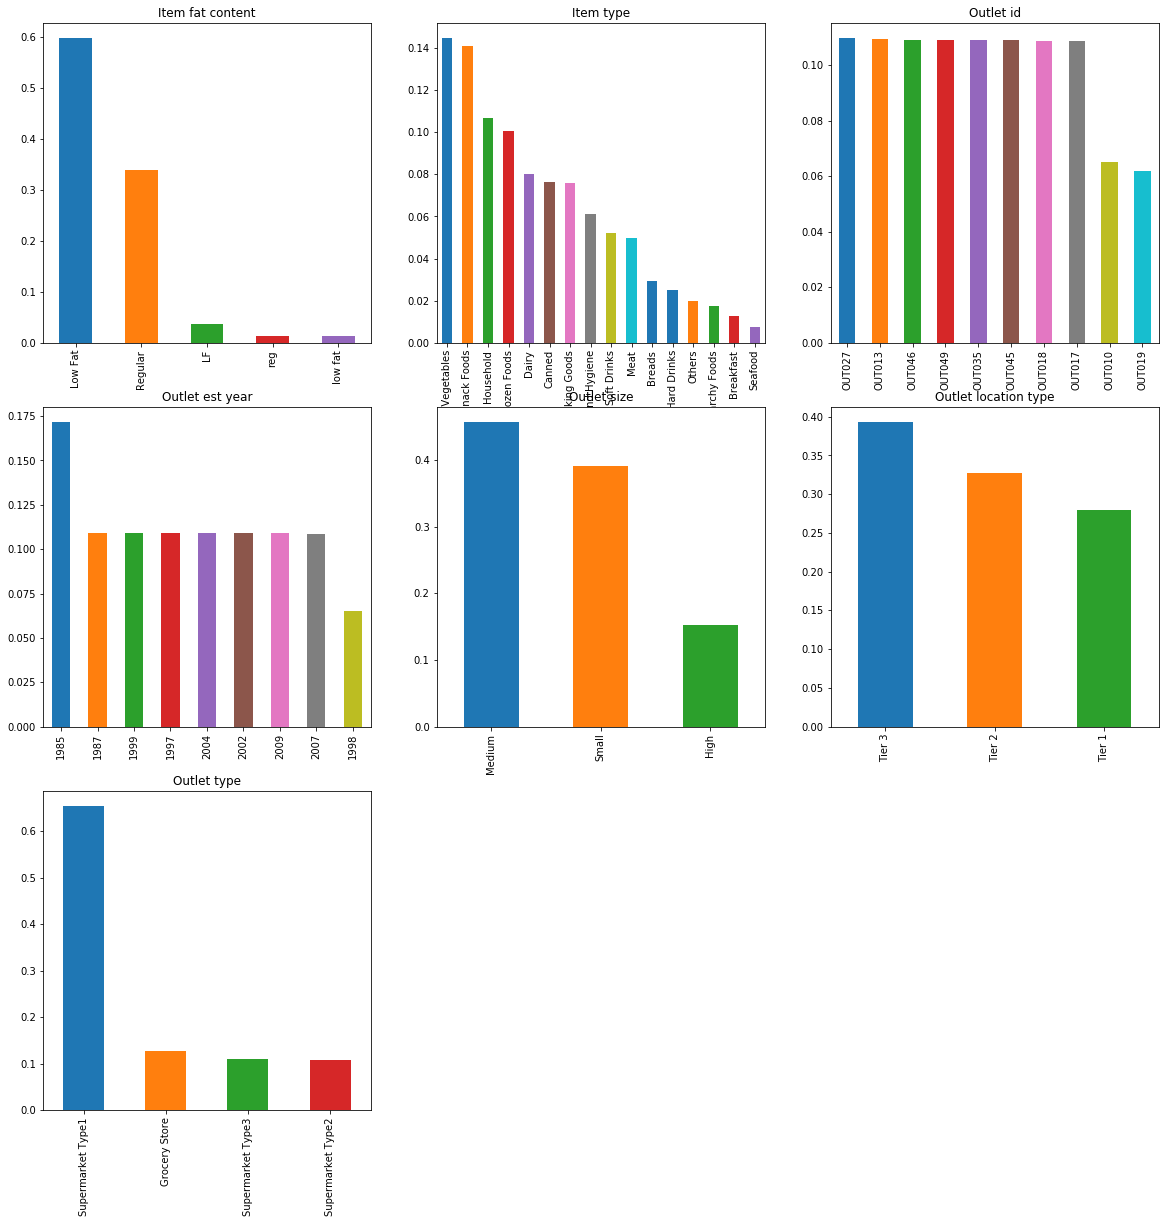

In [11]:
plt.figure(1)
figsize = (20,20)
plt.subplot(331)
train['Item_Fat_Content'].value_counts(normalize=True).plot.bar(figsize=figsize,title='Item fat content')
plt.subplot(332)
train['Item_Type'].value_counts(normalize=True).plot.bar(figsize=figsize, title='Item type')
plt.subplot(333)
train['Outlet_Identifier'].value_counts(normalize=True).plot.bar(figsize=figsize, title='Outlet id')
plt.subplot(334)
train['Outlet_Establishment_Year'].value_counts(normalize=True).plot.bar(figsize=figsize, title='Outlet est year')
plt.subplot(335)
train['Outlet_Size'].value_counts(normalize=True).plot.bar(figsize=figsize, title='Outlet size')
plt.subplot(336)
train['Outlet_Location_Type'].value_counts(normalize=True).plot.bar(figsize=figsize, title='Outlet location type')
plt.subplot(337)
train['Outlet_Type'].value_counts(normalize=True).plot.bar(figsize=figsize, title='Outlet type')
plt.show()

It can be inferred from above plots:
+ Item fat content has 2 categories "Low fat" and "Regular". We need to standardize "LF" and "low fat" to "Low Fat", "reg" to "Regular"
+ Almost 50% of items are covered as "Vegetables", "Snack foods", "Household" and "Frozen foods"
+ Oldest outlet is from 1985 and then remaining are established in 1987-2007 except 1998
+ Outlets have sales in following order according to size: Medium > Small > High
+ Outlets have sales in following order according to location type: Tier 3 > Tier 2 > Tier 1
+ Almost 65% outlets are of "Supermarket type1" type. 

#### Independent variable (Numerical)
Let's visualize the numerical variables:

1. Item_Weight
2. Item_Visibility
3. Item_MRP

C:\Users\Peeush Agarwal\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


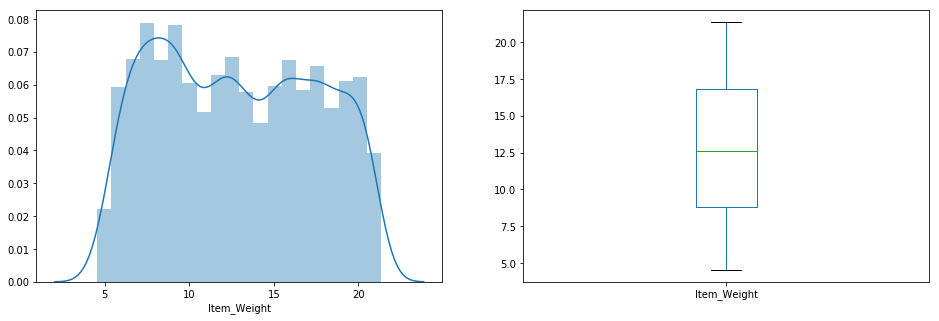

In [12]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['Item_Weight'].dropna())
plt.subplot(122)
train['Item_Weight'].plot.box(figsize=(16,5))
plt.show()

C:\Users\Peeush Agarwal\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


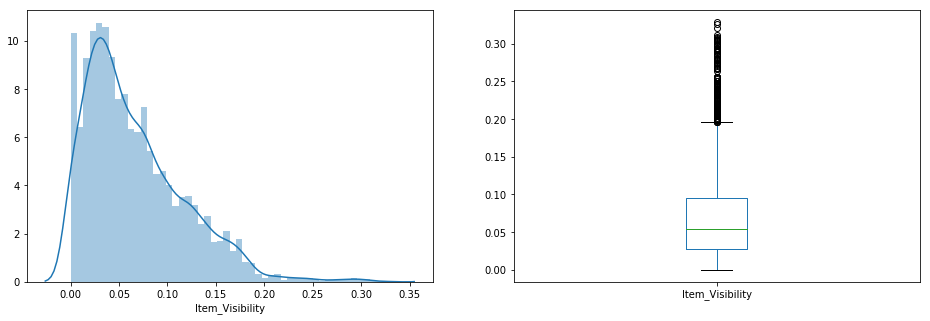

In [13]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['Item_Visibility'])
plt.subplot(122)
train['Item_Visibility'].plot.box(figsize=(16,5))
plt.show()

C:\Users\Peeush Agarwal\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


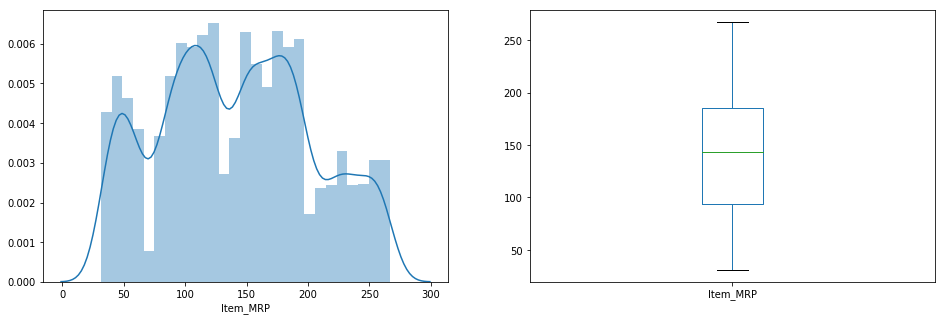

In [14]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['Item_MRP'])
plt.subplot(122)
train['Item_MRP'].plot.box(figsize=(16,5))
plt.show()

It can be inferred from numerical variable plots:
+ Item_Weight is missing values. But no outliers. Average weight is approx 12.5 units
+ Item_Visibility has no missing values, but there are outliers. Average visibility is 5% approx
+ Item_MRP has no missing values and outliers. Average MRP is 150 units. 

Now, let's visualize each feature with Target variable. 

### 3. Bivariate analysis

#### Categorical Independent variable vs Target variable

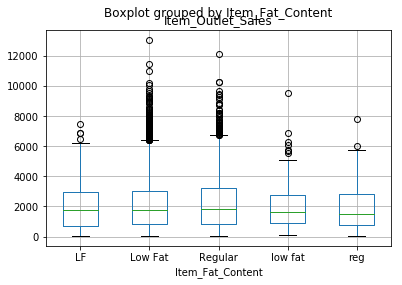

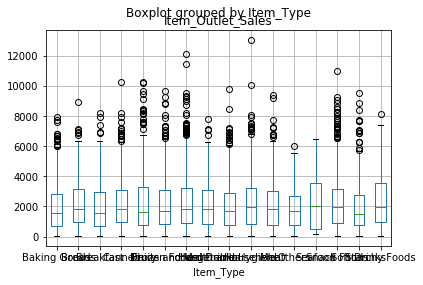

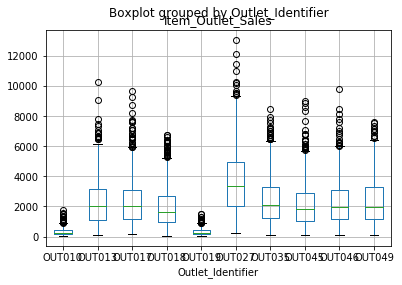

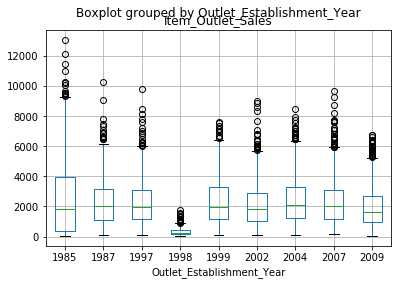

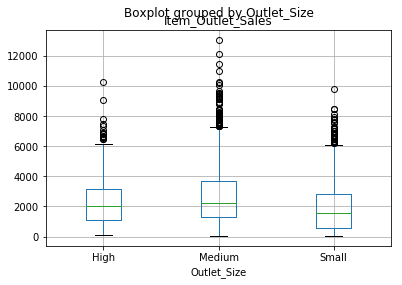

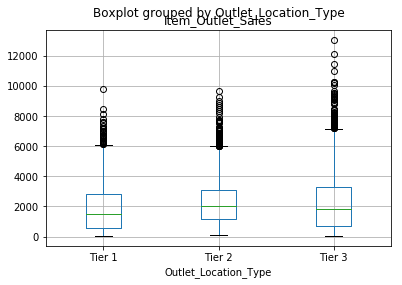

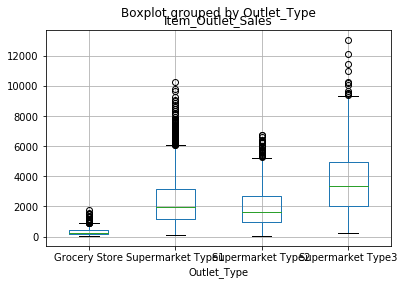

In [15]:
# train['Item_Fat_Content'].value_count
# train['Item_Type'].value_counts(norma
# train['Outlet_Identifier'].value_coun
# train['Outlet_Establishment_Year'].va
# train['Outlet_Size'].value_counts(nor
# train['Outlet_Location_Type'].value_c
# train['Outlet_Type'].value_counts(nor

train.boxplot(column='Item_Outlet_Sales', by='Item_Fat_Content')
train.boxplot(column='Item_Outlet_Sales', by='Item_Type')
train.boxplot(column='Item_Outlet_Sales', by='Outlet_Identifier')
train.boxplot(column='Item_Outlet_Sales', by='Outlet_Establishment_Year')
train.boxplot(column='Item_Outlet_Sales', by='Outlet_Size')
train.boxplot(column='Item_Outlet_Sales', by='Outlet_Location_Type')
train.boxplot(column='Item_Outlet_Sales', by='Outlet_Type')

It can be inferred from above plots that:
+ Item fat content, Item type have not much effect on Outlet Sales
+ 1 outlet has higher sales than all, 2 outlets have very low average sales and rest have almost similar sales. 
+ All outlets established in various years have similar sales except 1998 established outlet
+ Medium, High sized outlets have higher sales than Small sized outlet
+ Tier 2, Tier 3 have better sales than Tier 1
+ Outlet "SuperMarket_Type3" outperforms other outlet in sales

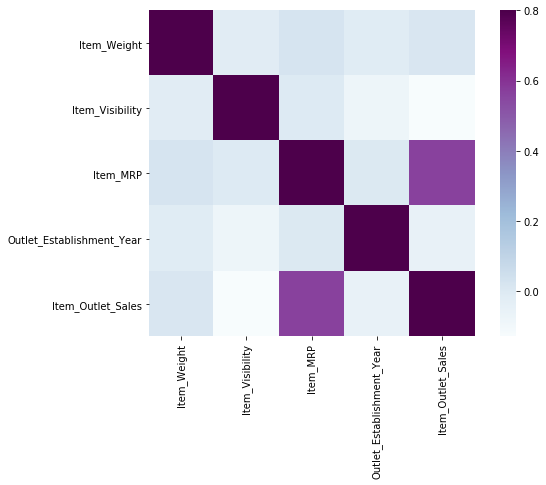

In [16]:
matrix = train.corr()
f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(matrix, vmax=.8,square=True, cmap="BuPu")

Only Item_MRP is highly correlated with Item_Outlet_Sales in numerical variables. 

In [17]:
# As we found out Item_Fat_Content need to be standardized. 
train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [18]:
# We can replace "LF","low fat" to "Low Fat"
train['Item_Fat_Content'].replace('LF', 'Low Fat', inplace = True)
train['Item_Fat_Content'].replace('low fat', 'Low Fat', inplace = True)

test['Item_Fat_Content'].replace('LF', 'Low Fat', inplace = True)
test['Item_Fat_Content'].replace('low fat', 'Low Fat', inplace = True)


# Also, we can replace "reg" to "Regular"
train['Item_Fat_Content'].replace('reg', 'Regular', inplace=True)
test['Item_Fat_Content'].replace('reg', 'Regular', inplace=True)

In [19]:
train['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [20]:
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [21]:
train['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
FDU12     9
NCB18     9
NCF42     9
FDW49     9
FDF52     9
FDW26     9
FDO19     9
FDX04     9
FDQ40     9
NCJ30     9
FDF56     9
FDT07     9
FDD38     9
FDX31     9
DRE49     9
DRN47     9
NCQ06     9
FDX20     9
NCL31     9
NCY18     9
FDP25     9
FDG09     9
NCI54     9
FDV38     9
FDV60     9
DRP35     8
FDA15     8
FDA13     8
         ..
FDA48     2
FDE39     2
NCC55     2
NCW30     2
FDI36     2
FDD48     2
DRC24     2
FDG28     2
NCX53     2
FDB47     2
FDR57     2
FDM16     2
FDW58     2
NCM42     2
FDD22     2
NCV18     2
FDM38     2
NCW05     2
FDT33     2
DRG25     2
FDF38     2
FDY43     1
FDC23     1
FDO33     1
FDK57     1
FDQ60     1
FDE52     1
FDN52     1
FDT35     1
DRF48     1
Name: Item_Identifier, Length: 1559, dtype: int64

Since there are total 1559 unique Item_Identifier, we can drop this column. 

In [22]:
train = train.drop('Item_Identifier', axis=1)
print(train.shape)

test = test.drop('Item_Identifier', axis=1)
print(test.shape)

(8523, 11)
(5681, 10)


### 4. Missing value imputation

In [23]:
train.isnull().sum()

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

*Item_Weight* and *Outlet_Size* are missing values in train dataset. 

We consider following methods to impute missing values:
+ For numerical variables: Use Mean or median depending on outliers
+ For categorical variables: Use Mode

In [24]:
# Item_Weight is numerical variable
# Since Item_Weight has no outliers, we can use Mean as impute method for missing values. 

train['Item_Weight'].fillna(train['Item_Weight'].mean(), inplace=True)

In [25]:
# Outlet_Size is categorical variable, we use mode
train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0], inplace=True)

In [26]:
train.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

As we can see that all the missing values have been filled in the train dataset. Let’s fill all the missing values in the test dataset too with the same approach.

In [27]:
test['Item_Weight'].fillna(test['Item_Weight'].mean(), inplace=True)
test['Outlet_Size'].fillna(test['Outlet_Size'].mode()[0], inplace=True)

In [28]:
test.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

### 5. Outlier treatment

Since *Item_Visibility* is the numerical variable having Outliers, we can try to look for log transformation

In [29]:
train['Item_Visibility'].describe()

count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

In [30]:
train['Item_Visibility'].quantile([0,.1,.2,.3,.4,.5,.6,.7,.8,.9,.95,1])

0.00    0.000000
0.10    0.012042
0.20    0.022558
0.30    0.031956
0.40    0.041754
0.50    0.053931
0.60    0.067958
0.70    0.083456
0.80    0.106924
0.90    0.139514
0.95    0.163780
1.00    0.328391
Name: Item_Visibility, dtype: float64

In [31]:
train[train['Item_Visibility'] < 0.163780]

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200000,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.930000,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,10.395000,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,13.650000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,12.857645,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,16.200000,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Medium,Tier 2,Supermarket Type1,1076.5986
9,19.200000,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Medium,Tier 2,Supermarket Type1,4710.5350


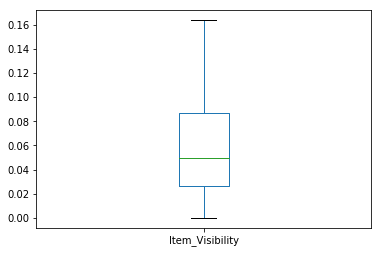

In [32]:
train[train['Item_Visibility'] < 0.163780]['Item_Visibility'].plot.box()

In [33]:
train = train[train['Item_Visibility'] < 0.163780]

In [34]:
train.shape

(8096, 11)

In [35]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8096.000000,8096.000000,8096.000000,8096.000000,8096.000000
mean,12.857022,0.059109,141.214729,1997.993083,2230.598177
std,4.254513,0.041686,62.361235,8.345027,1706.487250
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.300000,0.026140,93.835050,1987.000000,894.835200
50%,12.857645,0.049929,142.915400,1999.000000,1845.264700
75%,16.100000,0.086995,186.224650,2004.000000,3142.576000
max,21.350000,0.163548,266.888400,2009.000000,13086.964800


## Linear Regression Model Generation

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression # Import LinearRegression from sklearn

In [39]:
model = LinearRegression()

In [40]:
# Splitting train dataset into Training and CV for Cross Validation
X = train.loc[:, ['Outlet_Establishment_Year', 'Item_MRP']] # Taking only 2 columns as features
x_train, x_cv, y_train, y_cv = train_test_split(X, train.Item_Outlet_Sales)

# Training the model
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [41]:
# Predicting on CV
predict = model.predict(x_cv)

In [44]:
# Calculate MSE
mse = np.mean((predict - y_cv)**2)
print('Mean Squared Error: {0}'.format(mse))

Mean Squared Error: 1979467.0963583125


In [46]:
from pandas import DataFrame, Series

In [47]:
# Calculating Coefficients
coeff = DataFrame(x_train.columns)
coeff['Coefficient Estimate'] = Series(model.coef_) 
coeff

,0,Coefficient Estimate
0,Outlet_Establishment_Year,-15.834559
1,Item_MRP,15.507470


Therefore, we can see that MRP has a high coefficient, meaning items having higher prices have better sales.  

### Model Evaluation

#### R-Square

In [48]:
model.score(x_cv, y_cv)

0.3713799987901818

In this case, R^2 is 37% meaning only 37% of variance in sales is explained by Year of Establishment and MRP. 

Now, what would happen if I introduce one more feature in my model, will my model predict values more closely to its actual value? Will the value of R-Square increase? Let us consider another case.

### Model 4 - Linear Regression with more variables

Let us introduce another feature 'Item_Weight' and build model with 3 features

In [49]:
X = train.loc[:, ['Outlet_Establishment_Year','Item_MRP','Item_Weight']]

# Splitting data into x_train, x_cv, y_train, y_cv
x_train, x_cv, y_train, y_cv = train_test_split(X, train.Item_Outlet_Sales)

# Training model
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [50]:
# Predict on cv
predict = model.predict(x_cv)

In [51]:
# Calculate mse
mse = np.mean((predict - y_cv)**2)
mse

1852311.597502759

In [52]:
# Calculating coefficients
coeff = DataFrame(x_train.columns)
coeff['Coefficient Estimate'] = Series(model.coef_)
coeff

,0,Coefficient Estimate
0,Outlet_Establishment_Year,-16.069265
1,Item_MRP,15.848364
2,Item_Weight,-1.960450


#### Model evaluation - R-square

In [53]:
# Calculating R-Square
model.score(x_cv, y_cv)

0.34580110042988155

Therefore we can see that the mse is further reduced. There is an increase in the value R-square, does it mean that the addition of item weight is useful for our model? 

### Model 5 - Linear Regression with all features

In [54]:
# Data pre-processing steps for regression model
# Impute Item_Visibility of value 0 to mean
train['Item_Visibility'].replace(0, np.mean(train['Item_Visibility']), inplace=True)

# Outlet_Establishment_Year
train['Outlet_Establishment_Year'] = 2019 - train['Outlet_Establishment_Year']

# Create dummy variables to convert categorical into numeric values
cat_columns = list(train.select_dtypes(include=['object']).columns)
dummies = pd.get_dummies(train[cat_columns], prefix=cat_columns)
train.drop(cat_columns, axis=1, inplace=True)
X = pd.concat([train, dummies], axis=1)

In [55]:
# Build model
X = train.drop('Item_Outlet_Sales',1)
x_train, x_cv, y_train, y_cv = train_test_split(X,train.Item_Outlet_Sales, test_size =0.3)

# Training model
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [56]:
# Predicting on CV
predict = model.predict(x_cv)

# calculating mse
mse = np.mean((predict - y_cv)**2)
print(mse)

1917438.0135250126


#### Model Evalution using r-square

In [57]:
model.score(x_cv, y_cv)

0.35713415806183835